In [314]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras import layers
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

In [315]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [316]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [317]:
LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [318]:
N_TRAIN_SAMPLES = 45000
N_VAL_SAMPLES = 5000
N_TEST_SAMPLES = 10000
N_CLASSES = 10

In [319]:
x_val = x_train[:N_VAL_SAMPLES].copy()
y_val = y_train[:N_VAL_SAMPLES].copy()

x_train = x_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()
y_train = y_train[N_VAL_SAMPLES:N_TRAIN_SAMPLES+N_VAL_SAMPLES].copy()


In [320]:
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation images shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000, 1)
Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 1)


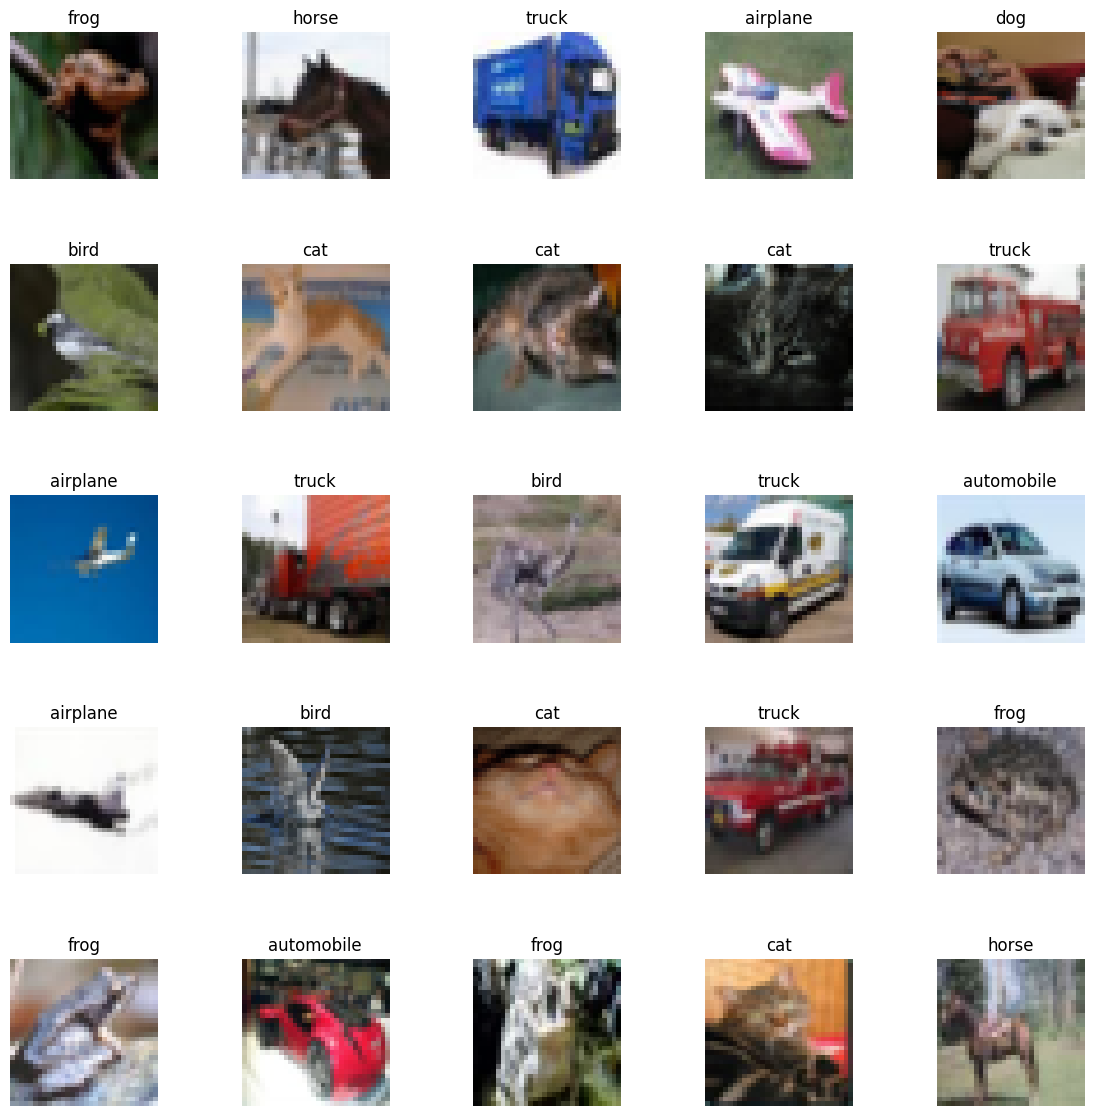

In [321]:
fig, axes = plt.subplots(5, 5, figsize=[12, 12])
fig.tight_layout(pad=3.0)
axes = axes.ravel()
for i in range (25):
  axes[i].imshow(x_train[i])
  axes[i].set_title(LABELS[y_train[i][0]])
  axes[i].axis('off')

plt.show()

In [322]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

y_train = to_categorical(y_train, N_CLASSES)
y_test = to_categorical(y_test, N_CLASSES)
y_val = to_categorical(y_val, N_CLASSES)

In [323]:
model = keras.models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=N_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_198 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_199 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_200 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_201 (Conv2D)         (None, 16, 16, 64)        36928     
                                                     

In [324]:
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [325]:
N_EPOCHS = 20
history = model.fit(x_train, y_train, batch_size=128, epochs=N_EPOCHS, validation_data=(x_val, y_val))

Epoch 1/20


2024-01-28 15:51:43.817752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


352/352 [==============================] - 8s 19ms/step - loss: 1.7688 - accuracy: 0.3428 - val_loss: 1.6761 - val_accuracy: 0.4754
Epoch 2/20
352/352 [==============================] - 6s 17ms/step - loss: 1.3815 - accuracy: 0.5006 - val_loss: 1.4051 - val_accuracy: 0.5842
Epoch 3/20
352/352 [==============================] - 6s 17ms/step - loss: 1.1779 - accuracy: 0.5830 - val_loss: 1.2357 - val_accuracy: 0.6122
Epoch 4/20
352/352 [==============================] - 6s 18ms/step - loss: 1.0470 - accuracy: 0.6326 - val_loss: 1.1116 - val_accuracy: 0.6822
Epoch 5/20
352/352 [==============================] - 6s 17ms/step - loss: 0.9561 - accuracy: 0.6661 - val_loss: 1.1228 - val_accuracy: 0.6310
Epoch 6/20
352/352 [==============================] - 6s 17ms/step - loss: 0.8830 - accuracy: 0.6950 - val_loss: 1.0240 - val_accuracy: 0.6866
Epoch 7/20
352/352 [==============================] - 6s 17ms/step - loss: 0.8259 - accuracy: 0.7123 - val_loss: 0.9240 - val_accuracy: 0.7256
Epoch 8/20

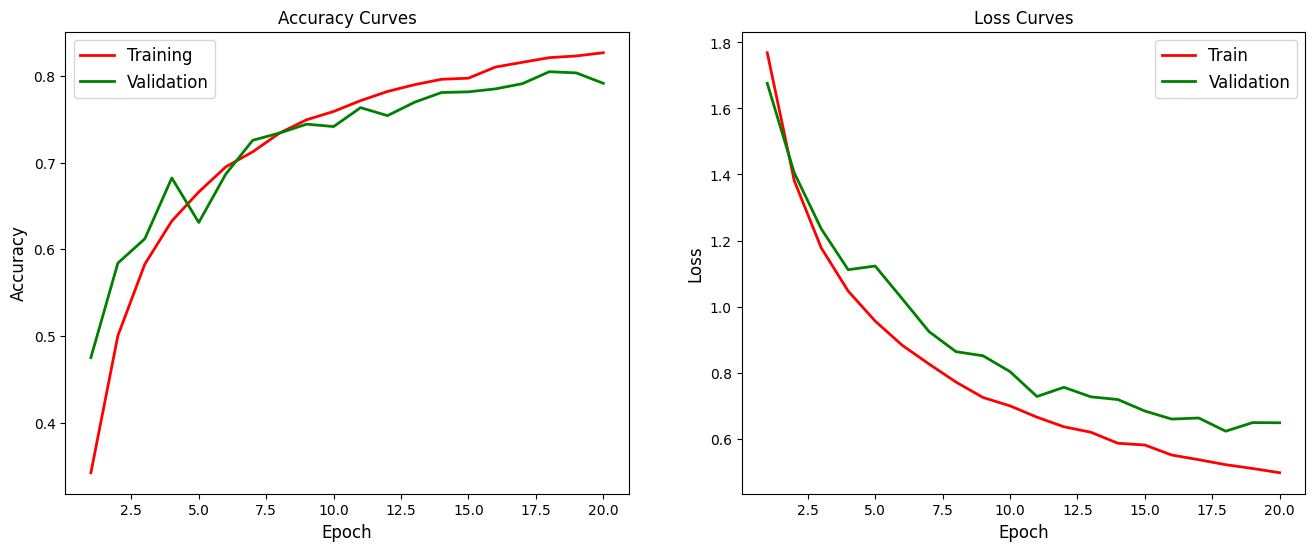

In [326]:
plt.figure(figsize=[16, 6])
plt.subplot(1, 2, 1)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], color="red", linewidth="2.0", label="Training")
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], color="green", linewidth="2.0", label="Validation")
plt.title("Accuracy Curves")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12)


plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], color="red", linewidth="2.0", label="Train")
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], color="green", linewidth="2.0", label="Validation")
plt.title("Loss Curves")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [327]:
N_PREDS = 25
pred_images = x_test[:N_PREDS]
pred_labels = y_test[:N_PREDS]

predictions = model.predict(pred_images)
print(predictions.shape)
print(predictions)
predictions = np.argmax(predictions, axis=1)
print(predictions.shape)
print(predictions)

1/1 [==============================] - 0s 82ms/step
(25, 10)
[[5.84741763e-04 4.95901259e-05 5.92836738e-03 7.51572371e-01
  4.04704781e-03 2.10136130e-01 2.26594452e-02 4.80934232e-03
  1.50028369e-04 6.29127389e-05]
 [4.42813907e-04 1.69747014e-04 3.36137049e-07 1.16426111e-06
  8.45124987e-07 1.09413314e-08 2.96317296e-07 5.23091011e-08
  9.98914003e-01 4.70720261e-04]
 [6.64117560e-02 1.45751443e-02 5.59289847e-03 1.97333843e-02
  1.22785941e-02 1.91789481e-03 8.96335300e-03 4.14119521e-03
  8.25392127e-01 4.09937091e-02]
 [7.24553645e-01 2.36276840e-03 7.66265541e-02 9.18210763e-03
  1.88767239e-02 1.15638715e-03 1.08728814e-03 2.24844017e-03
  1.43187597e-01 2.07184721e-02]
 [6.55977010e-06 6.15326030e-08 3.39755937e-02 3.17852222e-03
  7.94908404e-03 1.23238569e-04 9.54760194e-01 4.10919074e-06
  1.92619223e-06 6.59970624e-07]
 [9.40629106e-05 1.73915614e-05 2.89342087e-02 5.36263399e-02
  2.42434796e-02 1.25720184e-02 8.79248023e-01 1.03088678e-03
  1.81380514e-04 5.22742666e-0

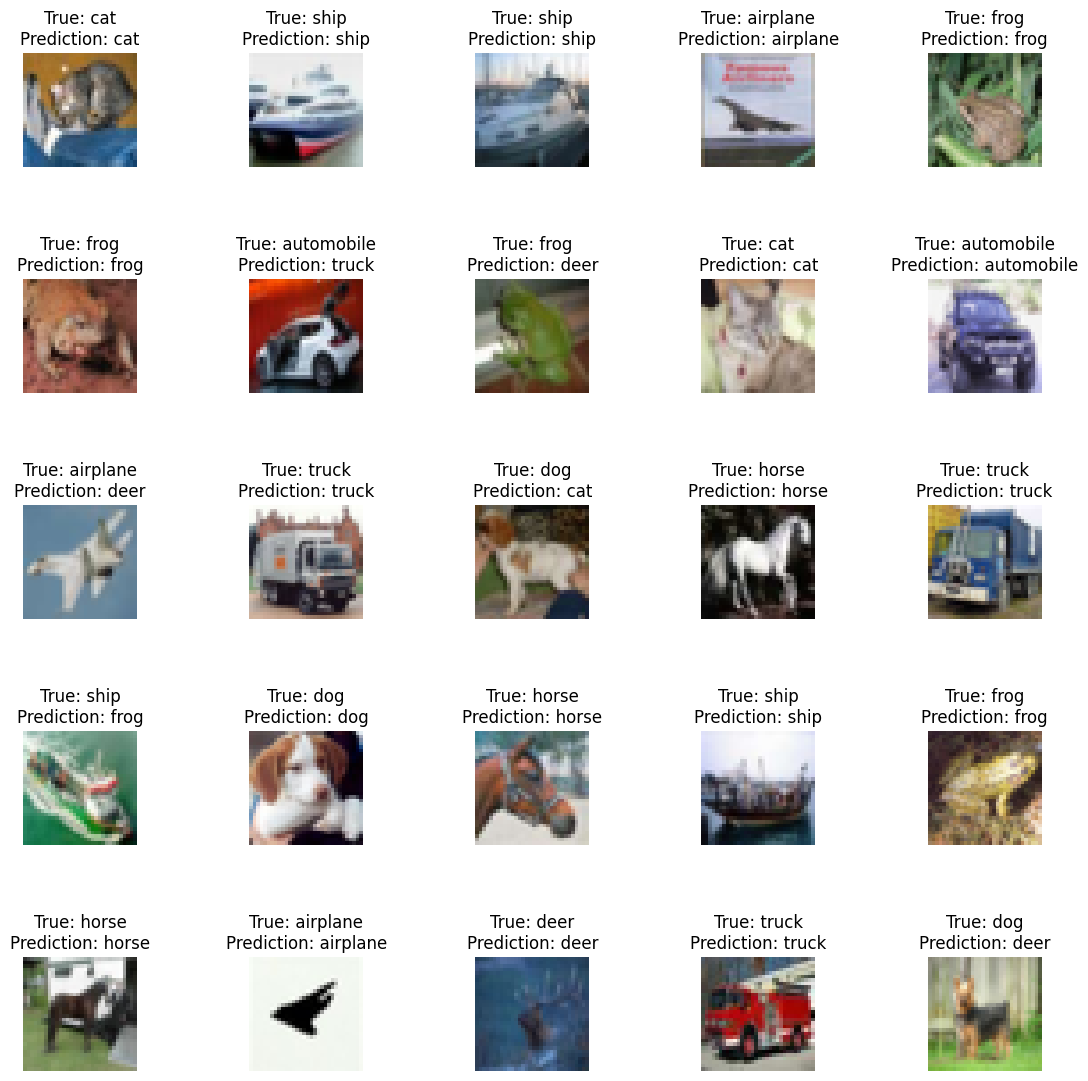

In [328]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
fig.tight_layout(pad=5.0)
axes = axes.ravel()

for i in range(0, N_PREDS):
    axes[i].imshow(pred_images[i])
    axes[i].set_title(f"True: {LABELS[np.argmax(pred_labels[i])]}\nPrediction: {LABELS[predictions[i]]}")
    axes[i].axis('off')

plt.show()

In [329]:
test_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6695 - accuracy: 0.7782


In [330]:
print(f"Test Accuracy: {test_results[1]}\nTest Loss: {test_results[0]}")

Test Accuracy: 0.7781999707221985
Test Loss: 0.6694565415382385
